In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/Users/apple/Downloads/Project/KidneyFunction-Prediction-Focused-on-predicting-kidney-function-keyword-rich/research/kidney_dataset.csv')
df.head()

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
0,0.788803,8.386869,102.161787,1632.649387,0,0,27.682074,106.700203,1.570370,NaN,0
1,3.413970,53.688796,50.071257,935.540516,1,0,33.122208,410.008362,3.425287,ACE Inhibitor,1
2,0.647645,7.466540,89.451831,1774.553846,1,1,55.832284,123.336925,1.123301,Diuretic,0
3,0.795508,12.516821,99.872180,2360.602980,0,0,32.391900,116.098870,3.086846,ACE Inhibitor,0
4,0.869010,19.855960,86.110182,1987.750901,0,1,66.689515,55.668760,2.174980,ARB,0


In [ ]:
df.shape

(5000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Creatinine        5000 non-null   float64
 1   BUN               5000 non-null   float64
 2   GFR               5000 non-null   float64
 3   Urine_Output      5000 non-null   float64
 4   Diabetes          5000 non-null   int64  
 5   Hypertension      5000 non-null   int64  
 6   Age               5000 non-null   float64
 7   Protein_in_Urine  5000 non-null   float64
 8   Water_Intake      5000 non-null   float64
 9   Medication        2013 non-null   object 
 10  CKD_Status        5000 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 429.8+ KB


In [ ]:
df.describe()

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,CKD_Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.994088,30.780063,73.251883,1664.302800,0.294000,0.378200,50.048733,537.053851,2.504335,0.263000
std,2.027013,31.148341,31.972399,599.384655,0.455637,0.484986,14.492020,817.510451,0.868925,0.440306
min,0.600040,7.007732,5.000000,400.502554,0.000000,0.000000,18.000000,50.010471,1.000810,0.000000
25%,0.801333,11.367599,53.036801,1105.890821,0.000000,0.000000,40.190016,83.692533,1.744138,0.000000
50%,1.007629,15.878566,89.555882,1814.499690,0.000000,0.000000,49.942824,119.492591,2.511710,0.000000
75%,2.163997,40.636666,93.989273,2146.441778,1.000000,1.000000,59.761132,588.428649,3.268812,1.000000
max,7.996428,119.931652,105.451432,2499.939696,1.000000,1.000000,90.000000,2997.724192,3.998043,1.000000


In [ ]:
df.Medication.value_counts()

Medication
ACE Inhibitor    1013
ARB               779
Diuretic          221
Name: count, dtype: int64

In [ ]:
!pip install seaborn matplotlib


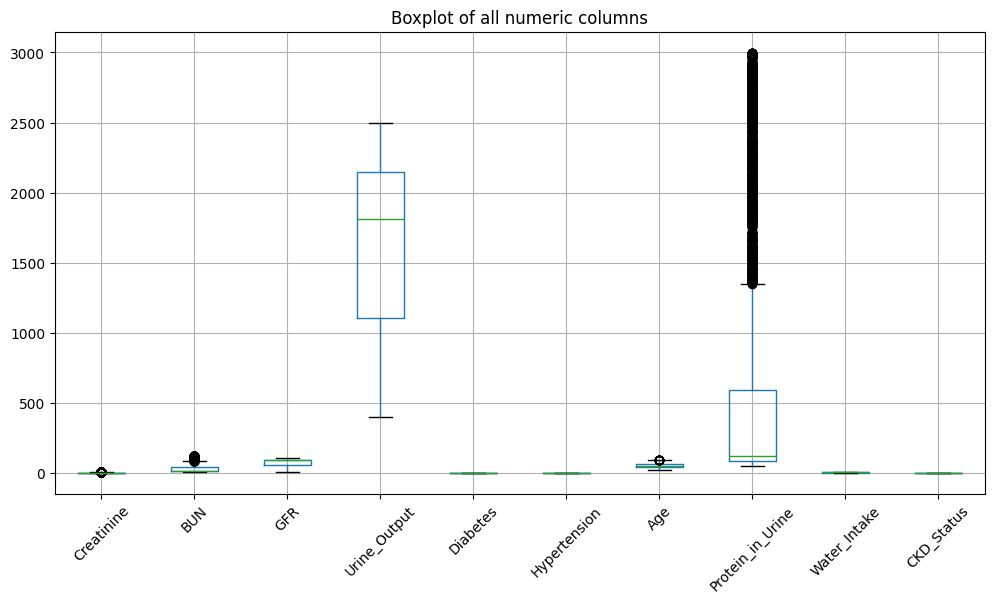

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
numeric_cols = df.select_dtypes(include='number').columns  
numeric_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.xticks(rotation=45)  # column নাম গুলো readable করতে
plt.title("Boxplot of all numeric columns")
plt.show()

In [ ]:
# Using IQR method to detect and remove outliers from all numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a mask for rows without outliers in any numeric column
mask = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_no_outliers = df[mask].reset_index(drop=True)
df_no_outliers.shape

(3717, 11)

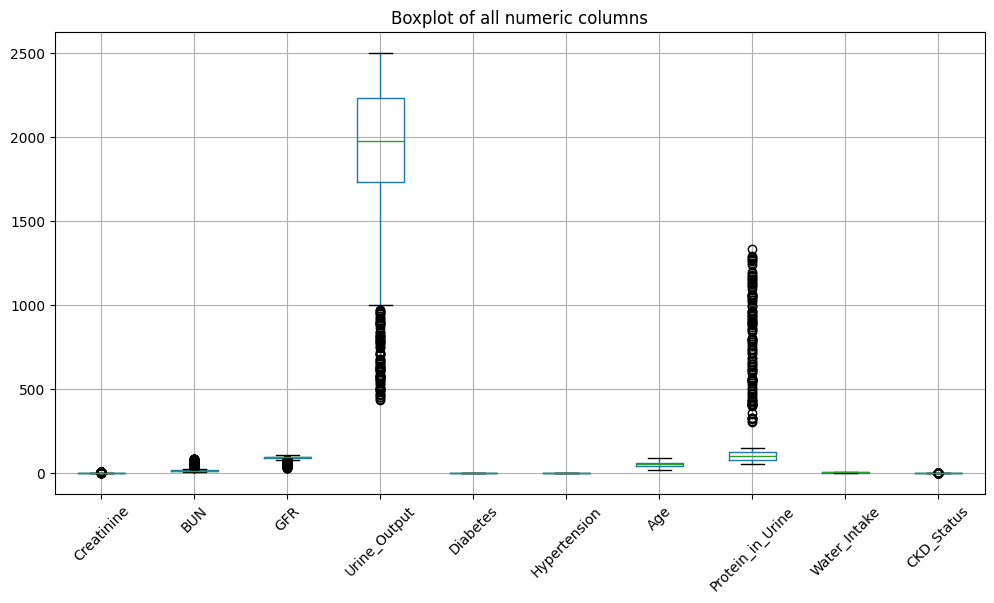

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
numeric_cols = df_no_outliers.select_dtypes(include='number').columns  
numeric_cols = df_no_outliers.select_dtypes(include='number').columns
plt.figure(figsize=(12, 6))
df_no_outliers[numeric_cols].boxplot()
plt.xticks(rotation=45)  # column নাম গুলো readable করতে
plt.title("Boxplot of all numeric columns")
plt.show()

In [ ]:
# Recalculate Q1, Q3, and IQR for the cleaned data
Q1_new = df_no_outliers[numeric_cols].quantile(0.25)
Q3_new = df_no_outliers[numeric_cols].quantile(0.75)
IQR_new = Q3_new - Q1_new

# Define a mask for rows without outliers in any numeric column (second pass)
mask_new = ~((df_no_outliers[numeric_cols] < (Q1_new - 1.5 * IQR_new)) | (df_no_outliers[numeric_cols] > (Q3_new + 1.5 * IQR_new))).any(axis=1)

# Remove outliers again
df_no_outliers_2 = df_no_outliers[mask_new].reset_index(drop=True)
df_no_outliers_2.shape

(3584, 11)

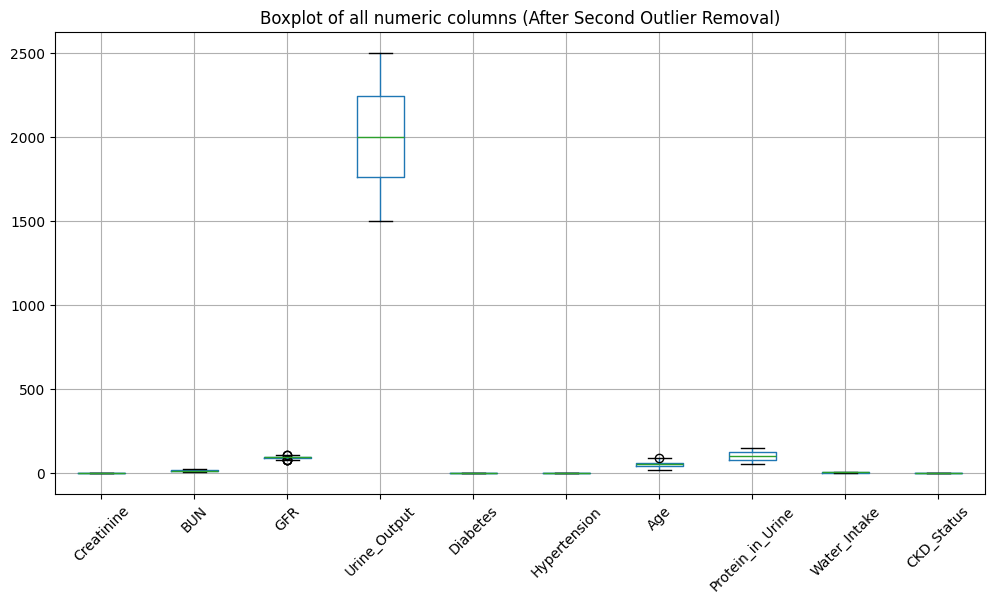

In [ ]:
plt.figure(figsize=(12, 6))
df_no_outliers_2[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of all numeric columns (After Second Outlier Removal)")
plt.show()

In [ ]:
df_no_outliers_2.shape

(3584, 11)

In [ ]:
!pip install scikit-learn==1.3.0



  Using cached scikit_learn-1.3.0-cp310-cp310-macosx_10_9_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.15.3-cp310-cp310-macosx_10_13_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.3.0-cp310-cp310-macosx_10_9_x86_64.whl (10.2 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.15.3-cp310-cp310-macosx_10_13_x86_64.whl (38.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Creatinine           3584 non-null   float64
 1   BUN                  3584 non-null   float64
 2   GFR                  3584 non-null   float64
 3   Urine_Output         3584 non-null   float64
 4   Diabetes             3584 non-null   int64  
 5   Hypertension         3584 non-null   int64  
 6   Age                  3584 non-null   float64
 7   Protein_in_Urine     3584 non-null   float64
 8   Water_Intake         3584 non-null   float64
 9   CKD_Status           3584 non-null   int64  
 10  Medication_ARB       3584 non-null   bool   
 11  Medication_Diuretic  3584 non-null   bool   
dtypes: bool(2), float64(7), int64(3)
memory usage: 287.1 KB
